# Criando os Nomes

In [1]:
import pandas as pd

In [2]:
nomes_f = pd.read_json("https://servicodados.ibge.gov.br/api/v1/censos/nomes/ranking?qtd=20&sexo=f")
len(nomes_f)

20

In [3]:
nomes_m = pd.read_json("https://servicodados.ibge.gov.br/api/v1/censos/nomes/ranking?qtd=20&sexo=m")
nomes_m

,nome,regiao,freq,rank,sexo
0,JOSE,0,5732508,1,M
1,JOAO,0,2971935,2,M
2,ANTONIO,0,2567494,3,M
3,FRANCISCO,0,1765197,4,M
4,CARLOS,0,1483121,5,M
5,PAULO,0,1417907,6,M
6,PEDRO,0,1213557,7,M
7,LUCAS,0,1116818,8,M
8,LUIZ,0,1102927,9,M
9,MARCOS,0,1101126,10,M


In [4]:
nomes_f.sample(5)

,nome,regiao,freq,rank,sexo
2,FRANCISCA,0,721637,3,F
5,JULIANA,0,562589,6,F
8,PATRICIA,0,529446,9,F
10,SANDRA,0,479230,11,F
16,JULIA,0,430067,17,F


In [5]:
nomes_m.sample(5)

,nome,regiao,freq,rank,sexo
14,MARCELO,0,690098,15,M
9,MARCOS,0,1101126,10,M
13,DANIEL,0,706527,14,M
2,ANTONIO,0,2567494,3,M
16,EDUARDO,0,628539,17,M


In [6]:
print('Quantidade de nomes: ' + str(len(nomes_f) + len(nomes_m)))

Quantidade de nomes: 40


In [7]:
frames = [nomes_f, nomes_m]

In [8]:
nomes = pd.concat(frames)['nome'].to_frame()
len(nomes)

40

In [9]:
nomes

,nome
0,MARIA
1,ANA
2,FRANCISCA
3,ANTONIA
4,ADRIANA
5,JULIANA
6,MARCIA
7,FERNANDA
8,PATRICIA
9,ALINE


# Incluindo ID dos alunos

In [10]:
import numpy as np
np.random.seed(123)

In [11]:
total_alunos = len(nomes)
total_alunos

40

In [12]:
nomes['id_aluno'] = np.random.permutation(total_alunos) + 1

In [13]:
nomes.sample(10)

,nome,id_aluno
8,PATRICIA,14
15,BRUNO,20
0,JOSE,26
11,GABRIEL,37
8,LUIZ,10
9,MARCOS,16
9,ALINE,21
17,FELIPE,35
12,RAFAEL,33
1,ANA,11


In [14]:
dominios = ['@dominiodoemail.com.br', '@servicodoemail.com']
nomes['dominio'] = np.random.choice(dominios, total_alunos)

In [15]:
nomes.sample(5)

,nome,id_aluno,dominio
14,MARCELO,23,@dominiodoemail.com.br
2,FRANCISCA,13,@servicodoemail.com
12,RAFAEL,33,@servicodoemail.com
9,ALINE,21,@servicodoemail.com
11,CAMILA,38,@dominiodoemail.com.br


In [16]:
nomes['email'] = nomes.nome.str.cat(nomes.dominio).str.lower()

In [17]:
nomes.sample(5)

,nome,id_aluno,dominio,email
4,ADRIANA,6,@dominiodoemail.com.br,adriana@dominiodoemail.com.br
0,MARIA,7,@dominiodoemail.com.br,maria@dominiodoemail.com.br
13,DANIEL,34,@dominiodoemail.com.br,daniel@dominiodoemail.com.br
15,LETICIA,40,@servicodoemail.com,leticia@servicodoemail.com
11,CAMILA,38,@dominiodoemail.com.br,camila@dominiodoemail.com.br


# Criando a tabela de cursos

In [18]:
!pip3 install html5lib
!pip3 install lxml

In [19]:
import html5lib

In [20]:
url = 'http://tabela-cursos.herokuapp.com/index.html'
cursos = (pd.read_html(url))

In [21]:
cursos

[                          Nome do curso
 0                 Lógica de programação
 1                         Java para Web
 2                           C# para Web
 3                         Ruby on Rails
 4                      Cursos de Python
 5                         PHP com MySql
 6                         .NET para web
 7            Novas integrações com Java
 8                          TDD com Java
 9                   Código limpo com C#
 10  Preparatório para certificação Java
 11                      Hardware básico
 12                Persistência com .NET
 13                  Desenvolvendo jogos
 14                     Análise de dados
 15                   Estatística básica
 16                  Internet das coisas
 17                Programação funcional
 18                Boas práticas em Java
 19          Orientação objetos com Java]

In [22]:
type(cursos)

list

In [23]:
cursos = cursos[0]

In [24]:
type(cursos)

pandas.core.frame.DataFrame

In [25]:
cursos.head()

,Nome do curso
0,Lógica de programação
1,Java para Web
2,C# para Web
3,Ruby on Rails
4,Cursos de Python


# Alterando o index 'nome do curso'

In [26]:
cursos = cursos.rename(columns = {'Nome do curso': 'nome_do_curso'})

In [27]:
cursos.head()

,nome_do_curso
0,Lógica de programação
1,Java para Web
2,C# para Web
3,Ruby on Rails
4,Cursos de Python


In [28]:
cursos['id'] = cursos.index + 1

In [29]:
cursos.head()

,nome_do_curso,id
0,Lógica de programação,1
1,Java para Web,2
2,C# para Web,3
3,Ruby on Rails,4
4,Cursos de Python,5


In [30]:
cursos = cursos.set_index('id')

In [31]:
cursos.head()

,nome_do_curso
id,
1,Lógica de programação
2,Java para Web
3,C# para Web
4,Ruby on Rails
5,Cursos de Python


# Matriculando os alunos nos cursos

In [32]:
nomes.sample(5)

,nome,id_aluno,dominio,email
7,FERNANDA,2,@dominiodoemail.com.br,fernanda@dominiodoemail.com.br
12,RAFAEL,33,@servicodoemail.com,rafael@servicodoemail.com
11,GABRIEL,37,@servicodoemail.com,gabriel@servicodoemail.com
17,LUCIANA,32,@servicodoemail.com,luciana@servicodoemail.com
13,BRUNA,8,@servicodoemail.com,bruna@servicodoemail.com


In [33]:
nomes['matriculas'] = np.ceil(np.random.exponential(size = total_alunos) * 1.5).astype(int)

In [34]:
nomes.sample(5)

,nome,id_aluno,dominio,email,matriculas
6,PEDRO,15,@dominiodoemail.com.br,pedro@dominiodoemail.com.br,1
16,JULIA,4,@servicodoemail.com,julia@servicodoemail.com,1
8,PATRICIA,14,@dominiodoemail.com.br,patricia@dominiodoemail.com.br,1
2,FRANCISCA,13,@servicodoemail.com,francisca@servicodoemail.com,2
4,ADRIANA,6,@dominiodoemail.com.br,adriana@dominiodoemail.com.br,1


In [35]:
nomes.matriculas.describe()

count    40.000000
mean      1.700000
std       0.966092
min       1.000000
25%       1.000000
50%       1.000000
75%       2.000000
max       4.000000
Name: matriculas, dtype: float64

In [36]:
!pip3 install seaborn
import seaborn as sns

C:\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='matriculas', ylabel='Density'>

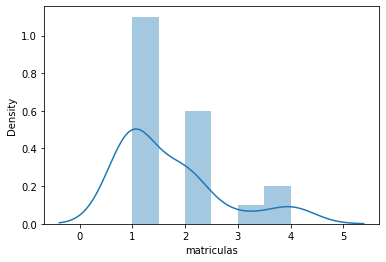

In [37]:
sns.distplot(nomes.matriculas)

In [38]:
nomes.matriculas.value_counts()

1    22
2    12
4     4
3     2
Name: matriculas, dtype: int64

# Selecionando cursos

In [39]:
nomes.sample(5)

,nome,id_aluno,dominio,email,matriculas
11,CAMILA,38,@dominiodoemail.com.br,camila@dominiodoemail.com.br,1
6,PEDRO,15,@dominiodoemail.com.br,pedro@dominiodoemail.com.br,1
10,SANDRA,9,@servicodoemail.com,sandra@servicodoemail.com,2
11,GABRIEL,37,@servicodoemail.com,gabriel@servicodoemail.com,3
3,FRANCISCO,36,@servicodoemail.com,francisco@servicodoemail.com,2


In [40]:
todas_matriculas = []
x = np.random.rand(20)
prob = x / sum(x)

In [41]:
for index, row in nomes.iterrows():
    id = row.id_aluno
    matriculas = row.matriculas
    for i in range(matriculas):
        mat = [id, np.random.choice(cursos.index, p = prob)]
        todas_matriculas.append(mat)

        
    matriculas = pd.DataFrame(todas_matriculas, columns = ['id_aluno', 'id_curso'])

In [42]:
matriculas.head(10)

,id_aluno,id_curso
0,7,16
1,11,8
2,13,16
3,13,20
4,39,5
5,39,9
6,6,10
7,12,9
8,24,7
9,2,8


In [43]:
matriculas.groupby('id_curso').count().join(cursos['nome_do_curso']).rename(columns={'id_aluno': 'quantidade_de_alunos'})

,quantidade_de_alunos,nome_do_curso
id_curso,,
1,3,Lógica de programação
2,2,Java para Web
3,3,C# para Web
4,1,Ruby on Rails
5,1,Cursos de Python
6,4,PHP com MySql
7,7,.NET para web
8,4,Novas integrações com Java
9,6,TDD com Java


In [44]:
nomes.sample(3)

,nome,id_aluno,dominio,email,matriculas
7,LUCAS,1,@servicodoemail.com,lucas@servicodoemail.com,2
0,MARIA,7,@dominiodoemail.com.br,maria@dominiodoemail.com.br,1
12,RAFAEL,33,@servicodoemail.com,rafael@servicodoemail.com,2


In [45]:
cursos.head(3)

,nome_do_curso
id,
1,Lógica de programação
2,Java para Web
3,C# para Web


In [46]:
matriculas.head(3)

,id_aluno,id_curso
0,7,16
1,11,8
2,13,16


In [47]:
matriculas_por_curso = matriculas.groupby('id_curso').count().join(cursos['nome_do_curso']).rename(columns={'id_aluno': 'quantidade_de_alunos'})
matriculas_por_curso.head(3)

,quantidade_de_alunos,nome_do_curso
id_curso,,
1,3,Lógica de programação
2,2,Java para Web
3,3,C# para Web


# Saída em diferentes formatos

In [48]:
matriculas_por_curso.head(3)

,quantidade_de_alunos,nome_do_curso
id_curso,,
1,3,Lógica de programação
2,2,Java para Web
3,3,C# para Web


In [49]:
matriculas_por_curso.to_csv('Matriculas_por_curso.csv', index = False)

In [50]:
matriculas_json = matriculas_por_curso.to_json()

In [51]:
matriculas_json

'{"quantidade_de_alunos":{"1":3,"2":2,"3":3,"4":1,"5":1,"6":4,"7":7,"8":4,"9":6,"10":7,"13":5,"14":1,"15":4,"16":3,"17":5,"18":5,"19":2,"20":5},"nome_do_curso":{"1":"L\\u00f3gica de programa\\u00e7\\u00e3o","2":"Java para Web","3":"C# para Web","4":"Ruby on Rails","5":"Cursos de Python","6":"PHP com MySql","7":".NET para web","8":"Novas integra\\u00e7\\u00f5es com Java","9":"TDD com Java","10":"C\\u00f3digo limpo com C#","13":"Persist\\u00eancia com .NET","14":"Desenvolvendo jogos","15":"An\\u00e1lise de dados","16":"Estat\\u00edstica b\\u00e1sica","17":"Internet das coisas","18":"Programa\\u00e7\\u00e3o funcional","19":"Boas pr\\u00e1ticas em Java","20":"Orienta\\u00e7\\u00e3o objetos com Java"}}'

In [52]:
matriculas_html = matriculas_por_curso.to_html()

In [53]:
print(matriculas_html)

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>quantidade_de_alunos</th>
      <th>nome_do_curso</th>
    </tr>
    <tr>
      <th>id_curso</th>
      <th></th>
      <th></th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>1</th>
      <td>3</td>
      <td>Lógica de programação</td>
    </tr>
    <tr>
      <th>2</th>
      <td>2</td>
      <td>Java para Web</td>
    </tr>
    <tr>
      <th>3</th>
      <td>3</td>
      <td>C# para Web</td>
    </tr>
    <tr>
      <th>4</th>
      <td>1</td>
      <td>Ruby on Rails</td>
    </tr>
    <tr>
      <th>5</th>
      <td>1</td>
      <td>Cursos de Python</td>
    </tr>
    <tr>
      <th>6</th>
      <td>4</td>
      <td>PHP com MySql</td>
    </tr>
    <tr>
      <th>7</th>
      <td>7</td>
      <td>.NET para web</td>
    </tr>
    <tr>
      <th>8</th>
      <td>4</td>
      <td>Novas integrações com Java</td>
    </tr>
    <tr>
      <th>9</th>
      <td>6</td>
      <td

# Criando Banco SQL

In [56]:
!pip3 install sqlalchemy

In [57]:
from sqlalchemy import create_engine, MetaData, Table, inspect

In [58]:
engine = create_engine('sqlite:///:memory:')
engine

Engine(sqlite:///:memory:)

In [59]:
type(engine)

sqlalchemy.engine.base.Engine

In [60]:
matriculas_por_curso.to_sql('matriculas', engine)

18

In [61]:
inspector = inspect(engine) # criando um Inspector object
print(inspector.get_table_names()) # Exibindo as tabelas com o inspecto

['matriculas']


# Buscando do banco sql

In [62]:
query = 'SELECT * FROM matriculas WHERE quantidade_de_alunos < 20'

In [63]:
pd.read_sql(query, engine)

,id_curso,quantidade_de_alunos,nome_do_curso
0,1,3,Lógica de programação
1,2,2,Java para Web
2,3,3,C# para Web
3,4,1,Ruby on Rails
4,5,1,Cursos de Python
5,6,4,PHP com MySql
6,7,7,.NET para web
7,8,4,Novas integrações com Java
8,9,6,TDD com Java
9,10,7,Código limpo com C#


In [65]:
pd.read_sql_table('matriculas', engine, columns = ['nome_do_curso', 'quantidade_de_alunos'])

,nome_do_curso,quantidade_de_alunos
0,Lógica de programação,3
1,Java para Web,2
2,C# para Web,3
3,Ruby on Rails,1
4,Cursos de Python,1
5,PHP com MySql,4
6,.NET para web,7
7,Novas integrações com Java,4
8,TDD com Java,6
9,Código limpo com C#,7


In [66]:
muitas_matriculas = pd.read_sql_table('matriculas', engine, columns = ['nome_do_curso', 'quantidade_de_alunos'])

In [73]:
muitas_matriculas.query('quantidade_de_alunos > 4')

,nome_do_curso,quantidade_de_alunos
6,.NET para web,7
8,TDD com Java,6
9,Código limpo com C#,7
10,Persistência com .NET,5
14,Internet das coisas,5
15,Programação funcional,5
17,Orientação objetos com Java,5


In [74]:
muitas_matriculas

,nome_do_curso,quantidade_de_alunos
0,Lógica de programação,3
1,Java para Web,2
2,C# para Web,3
3,Ruby on Rails,1
4,Cursos de Python,1
5,PHP com MySql,4
6,.NET para web,7
7,Novas integrações com Java,4
8,TDD com Java,6
9,Código limpo com C#,7


# Escrevendo no banco

In [75]:
muitas_matriculas.to_sql('muitas_matriculas', con = engine)

18

In [83]:
print(engine.table_names())

['matriculas', 'muitas_matriculas']


C:\Users\evers\AppData\Local\Temp/ipykernel_3208/1043810782.py:1: SADeprecationWarning: The Engine.table_names() method is deprecated and will be removed in a future release.  Please refer to Inspector.get_table_names(). (deprecated since: 1.4)
  print(engine.table_names())


# Nomes dos alunos e alunas da próxima turma

In [85]:
matriculas_por_curso.head(10)

,quantidade_de_alunos,nome_do_curso
id_curso,,
1,3,Lógica de programação
2,2,Java para Web
3,3,C# para Web
4,1,Ruby on Rails
5,1,Cursos de Python
6,4,PHP com MySql
7,7,.NET para web
8,4,Novas integrações com Java
9,6,TDD com Java


In [93]:
matriculas_por_curso.head(14)

,quantidade_de_alunos,nome_do_curso
id_curso,,
1,3,Lógica de programação
2,2,Java para Web
3,3,C# para Web
4,1,Ruby on Rails
5,1,Cursos de Python
6,4,PHP com MySql
7,7,.NET para web
8,4,Novas integrações com Java
9,6,TDD com Java


In [88]:
id_curso = 13
proxima_turma = matriculas.query("id_curso == {}".format(id_curso))
proxima_turma

,id_aluno,id_curso
11,14,13
26,22,13
36,36,13
39,28,13
50,31,13


In [94]:
nomes.sample(3)

,nome,id_aluno,dominio,email,matriculas
10,SANDRA,9,@servicodoemail.com,sandra@servicodoemail.com,2
1,ANA,11,@servicodoemail.com,ana@servicodoemail.com,1
15,BRUNO,20,@dominiodoemail.com.br,bruno@dominiodoemail.com.br,1


In [95]:
proxima_turma.set_index('id_aluno').join(nomes.set_index('id_aluno'))

,id_curso,nome,dominio,email,matriculas
id_aluno,,,,,
14,13,PATRICIA,@dominiodoemail.com.br,patricia@dominiodoemail.com.br,1
22,13,VANESSA,@servicodoemail.com,vanessa@servicodoemail.com,1
36,13,FRANCISCO,@servicodoemail.com,francisco@servicodoemail.com,2
28,13,PAULO,@dominiodoemail.com.br,paulo@dominiodoemail.com.br,4
31,13,LUIS,@dominiodoemail.com.br,luis@dominiodoemail.com.br,4


In [96]:
proxima_turma.set_index('id_aluno').join(nomes.set_index('id_aluno'))['nome']

id_aluno
14     PATRICIA
22      VANESSA
36    FRANCISCO
28        PAULO
31         LUIS
Name: nome, dtype: object

In [98]:
proxima_turma.set_index('id_aluno').join(nomes.set_index('id_aluno'))['nome'].to_frame()

,nome
id_aluno,
14,PATRICIA
22,VANESSA
36,FRANCISCO
28,PAULO
31,LUIS


In [118]:
nome_curso = cursos.loc[id_curso]
nome_curso

nome_do_curso    Persistência com .NET
Name: 13, dtype: object

In [119]:
nome_curso = nome_curso.nome_do_curso
nome_curso

'Persistência com .NET'

In [120]:
proxima_turma = proxima_turma.set_index('id_aluno').join(nomes.set_index('id_aluno'))['nome'].to_frame()

In [122]:
proxima_turma = proxima_turma.rename(columns = {'nome': 'Alunos do curso de {}'.format(nome_curso)})

In [123]:
proxima_turma.sample(4)

,Alunos do curso de Persistência com .NET
id_aluno,
36,FRANCISCO
22,VANESSA
28,PAULO
31,LUIS


# Excel

In [125]:
proxima_turma.to_excel('proxima_turma.xlsx', index = False)

In [126]:
pd.read_excel('proxima_turma.xlsx')

,Alunos do curso de Persistência com .NET
0,PATRICIA
1,VANESSA
2,FRANCISCO
3,PAULO
4,LUIS
